<a href="https://colab.research.google.com/github/devilgupta/c122/blob/main/C122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 #camera
import numpy as np #complex 
import pandas as pd #reading
import seaborn as sns #charts
import matplotlib.pyplot as plt #draw charts and beautify
from sklearn.datasets import fetch_openml #retrieve data 
from sklearn.model_selection import train_test_split  #training and testing data
from sklearn.linear_model import LogisticRegression #classifier creation
from sklearn.metrics import accuracy_score #accuracy measure

In [ ]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)
print(pd.Series(y).value_counts())
classes=['0','1','2','3','4','5','6','7','8','9']
nclasses=len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


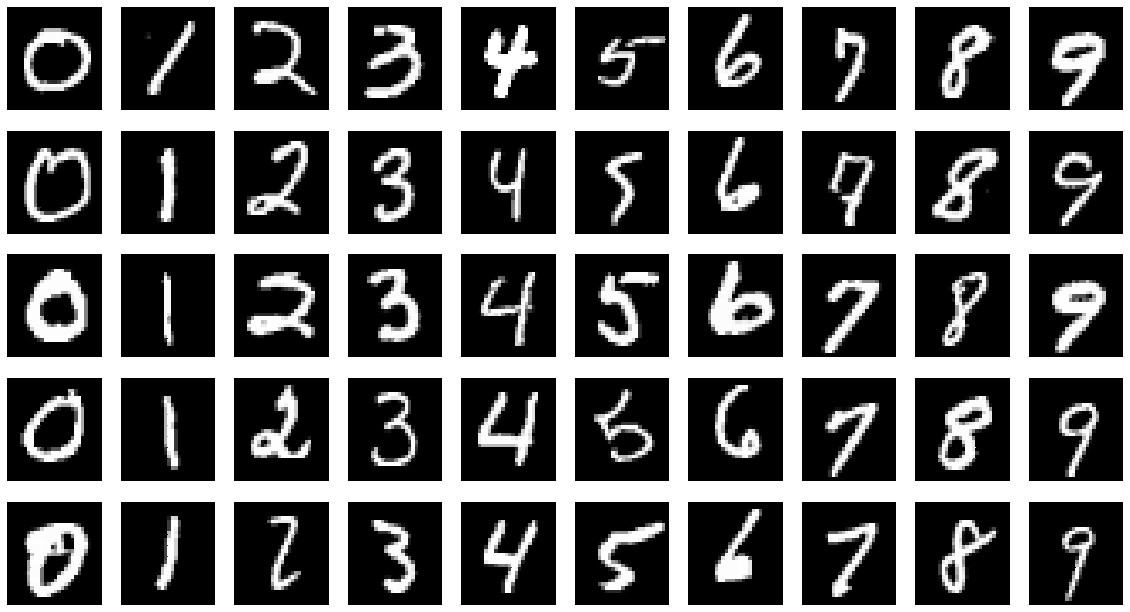

In [12]:
sample_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+sample_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, sample_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(sample_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [15]:
print(len(X))
print(len(X[0]))


70000
784
784


In [17]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=7500,test_size=2500)
X_train_scaled=X_train/255.0
X_test_scaled =X_test/255.0


In [24]:
clf=LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train_scaled,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [26]:
y_pred=clf.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

91.47999999999999


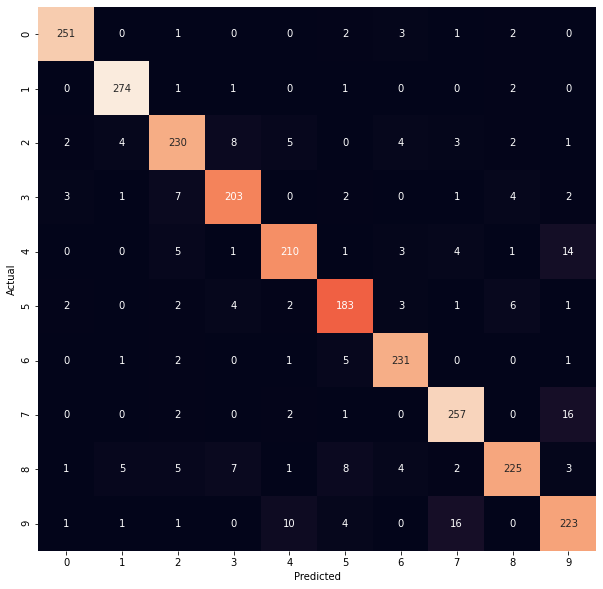

In [27]:
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
p=plt.figure(figsize=(10,10))
p=sns.heatmap(cm,annot=True,fmt="d",cbar=False)